In [33]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns

import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [2]:
#reduce blank values by using forward, then backward linear interpolation

def interpolate_by_state (df, column):
    df[column] = df.groupby('STATE')[column].apply(lambda group: group.interpolate())
    df[column] = df.groupby('STATE')[column].apply(lambda group: group.interpolate(method ='linear', limit_direction ='backward'))

interpolate_by_state(df, 'TOTAL_REVENUE')
interpolate_by_state(df, 'TOTAL_EXPENDITURE')

In [3]:
#remove rows where values are still null after interpolation (these are geographic regions
#where we have no data to interpolate from)

df = df[pd.notnull(df['TOTAL_EXPENDITURE'])]
df = df[pd.notnull(df['TOTAL_REVENUE'])]

In [4]:
df['TOTAL_REVENUE'].isnull().sum()*100/df['TOTAL_REVENUE'].isnull().count()

0.0

In [5]:
df['TOTAL_EXPENDITURE'].isnull().sum()*100/df['TOTAL_EXPENDITURE'].isnull().count()

0.0

In [6]:
#after dropping blank values, we still have 1331 rows, which is 89.2%
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1331 non-null object
STATE                           1331 non-null object
YEAR                            1331 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1331 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1331 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1218 non-null float64
GRADES_KG_G                     1229 non-null float64
GRADES_4_G                      1229 non-null float64
GRADES_8_G                      1

QUESTION 1: Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [7]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1331.000000,1.229000e+03,1.331000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.331000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1229.000000,1229.000000,1229.000000,1.229000e+03,1.229000e+03,1.218000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.515402,9.159308e+05,9.246804e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.342417e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,70423.102522,70161.833198,59374.808788,5.666138e+05,2.701086e+05,8.575149e+05,234.768293,278.414711,218.866154,263.661132
std,7.493076,1.065280e+06,1.200350e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.220752e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,82187.485646,80687.469082,69430.696512,6.586465e+05,3.147253e+05,9.886245e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,2548.000000,1485.000000,484.000000,1.922600e+04,2.758000e+03,2.455400e+04,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.200842e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.176975e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,19305.000000,20091.000000,17020.000000,1.560330e+05,7.611800e+04,2.538248e+05,229.694352,272.761598,214.663401,259.533171
50%,2005.000000,6.483130e+05,5.169926e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.298267e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,49288.000000,49332.000000,39634.000000,3.994940e+05,1.817190e+05,6.088460e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.109900e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.087317e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,79078.000000,80022.000000,69858.000000,6.384470e+05,3.106070e+05,9.672780e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [8]:
# descriptive statistics for just text-based variables
df.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1331,1331
unique,1326,51
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,29


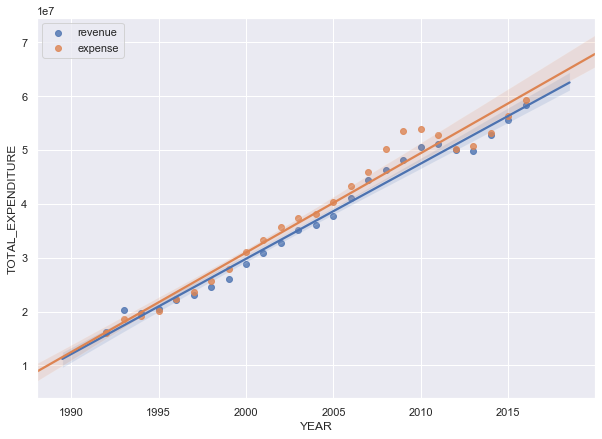

In [54]:
pd.set_option('float_format', '{:f}'.format)
Texas = df[df['STATE']=='TEXAS']

plt.figure(figsize = (10,7))
sns.set(color_codes=True)
sns.color_palette('Set2')
sns.regplot(x='YEAR', y='TOTAL_REVENUE', data=Texas, label="revenue")
sns.regplot(x='YEAR', y='TOTAL_EXPENDITURE', data=Texas, label='expense')
plt.legend()


plt.show()

In [58]:
Texas

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
44,1992_TEXAS,TEXAS,1992,nan,16264180.000000,1160185.000000,6706959.000000,8397036.000000,16119084.000000,7961379.000000,...,282693.000000,261053.000000,180206.000000,2258666.000000,907423.000000,3279286.000000,217.918744,264.592828,212.394311,nan
96,1993_TEXAS,TEXAS,1993,3535333.000000,20267205.000000,1233446.000000,9919561.000000,9114198.000000,18574871.000000,8914245.000000,...,284394.000000,274208.000000,178889.000000,2291961.000000,927209.000000,3339616.000000,nan,nan,nan,nan
148,1994_TEXAS,TEXAS,1994,3601627.000000,19713604.000000,1456330.000000,8569649.000000,9687625.000000,19224149.000000,9814470.000000,...,291604.000000,281109.000000,183737.000000,2319822.000000,956548.000000,3405106.000000,nan,nan,nan,nan
201,1995_TEXAS,TEXAS,1995,3670007.000000,20483376.000000,1496378.000000,8718907.000000,10268091.000000,20198924.000000,10652067.000000,...,292191.000000,284875.000000,186229.000000,2341811.000000,990894.000000,3466459.000000,nan,nan,nan,nan
252,1996_TEXAS,TEXAS,1996,3740260.000000,22241369.000000,1613462.000000,9834742.000000,10793165.000000,22401797.000000,11427564.000000,...,294431.000000,290666.000000,195075.000000,2381712.000000,1028958.000000,3543973.000000,228.712920,270.199578,216.862012,263.591742
304,1997_TEXAS,TEXAS,1997,3826366.000000,23091567.000000,1688975.000000,9878849.000000,11523743.000000,23671010.000000,12038459.000000,...,296894.000000,292648.000000,206928.000000,2407162.000000,1059416.000000,3602194.000000,nan,nan,nan,nan
355,1998_TEXAS,TEXAS,1998,3888061.000000,24485263.000000,1830474.000000,10632566.000000,12022223.000000,25723965.000000,12804069.000000,...,301475.000000,299760.000000,212503.000000,2440832.000000,1077158.000000,3654935.000000,nan,nan,nan,nan
407,1999_TEXAS,TEXAS,1999,3933017.000000,26096023.000000,2161662.000000,10802214.000000,13132147.000000,27883593.000000,13486659.000000,...,308232.000000,300830.000000,217670.000000,2466812.000000,1095930.000000,3700977.000000,nan,nan,nan,nan
460,2000_TEXAS,TEXAS,2000,3965971.000000,28918934.000000,2406972.000000,12471856.000000,14040106.000000,31067935.000000,15018072.000000,...,313731.000000,304419.000000,219943.000000,2503059.000000,1116572.000000,3765402.000000,232.666030,274.846016,216.932242,268.090027
481,2016_TEXAS,TEXAS,2016,5053291.000000,58284155.000000,5953348.000000,22004299.000000,30326508.000000,59314884.000000,27862199.000000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [57]:
Texas['AVG_MATH_4_SCORE'] = Texas['AVG_MATH_4_SCORE']

ave_math4 = Texas['AVG_MATH_4_SCORE']
ave_math8 = Texas['AVG_MATH_8_SCORE']
ave_read4 = Texas['AVG_READING_4_SCORE'] 
ave_read8 = Texas['AVG_READING_8_SCORE'] 


plt.figure(figsize = (10,7))
sns.set(color_codes=True)
sns.color_palette('Set2')
sns.regplot(x='YEAR', y='ave_math4', data=Texas, label="Math 4")
sns.regplot(x='YEAR', y='ave_math8', data=Texas, label="Math 8")

sns.regplot(x='YEAR', y='ave_read4', data=Texas, label='Read 4')
sns.regplot(x='YEAR', y='ave_read8', data=Texas, label='Read 8')
plt.legend()

plt.show()

KeyError: 'ave_math4'

<Figure size 720x504 with 0 Axes>